In [26]:
#1. Refresher: Basic SQL Operations in Spark SQL
#Tugas 1:  Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataEmp").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)

df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

25/10/29 22:26:40 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [35]:
#2. Advanced Queries for Data Analysis
#Tugas 2: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.
print("Total Gaji Berdasarkan Jenis Kelamin dan Usia")
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

#Tugas Tambahan 2:
#1. Cari rata-rata gaji per departemen.
print("Rata-Rata Gaji per Departemen")
spark.sql('''
SELECT DeptId, AVG(Salary) as Rata_Rata_Gaji
FROM employees
GROUP by DeptId
''').show()

#2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
print("Gaji di Atas 3000 tiap Gender")
spark.sql('''
SELECT employees.Name, employees.Gender, employees.Salary
FROM employees
JOIN (
    SELECT Gender, AVG(Salary) AS RerataGaji
    FROM employees
    GROUP BY Gender
) AS rata_rata ON employees.Gender = rata_rata.Gender
WHERE employees.Salary >= 3000
''').show(2)

#3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
print("Ranking Karyawan Berdasarkan Gaji dalam Department")
spark.sql('''
SELECT Name, DeptId, Salary,
row_number() OVER (partition BY DeptId ORDER BY Salary desc) AS rank
FROM employees
WHERE DeptId = 1
''').show()

spark.sql('''
SELECT Name, DeptId, Salary,
row_number() OVER (partition BY DeptId ORDER BY Salary desc) AS rank
FROM employees
WHERE DeptId = 2
''').show()

Total Gaji Berdasarkan Jenis Kelamin dan Usia
+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+

Rata-Rata Gaji per Departemen
+------+--------------+
|DeptId|Rata_Rata_Gaji|
+------+--------------+
|     1|        2850.0|
|     2|        4100.0|
+------+--------------+

Gaji di Atas 3000 tiap Gender
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
| Anna|     F|  4100|
+-----+------+------+

Ranking Karyawan Berdasarkan Gaji dalam Department
+-----+------+------+----+
| Name|DeptId|Salary|rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
+-----+------+------+----+

+----+------+------+----+
|Name|DeptId|Salary|rank|
+----+------+------+----+
|Anna|     2|  4100|   1|
+----+------+------+----+



In [2]:
#3. Penggunaan Window Functions dan Subqueries
#Tugas 1: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [3]:
#4. Advanced Spark SQL Queries
#Tugas 4: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

25/10/29 21:55:07 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
[Stage 14:====================================>                     (5 + 3) / 8]

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [41]:
#Tugas 5: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
spark.sql('''
SELECT DeptId, AVG(Salary) AS AVGSalary
FROM employees
GROUP BY DeptId
''').show()

spark.sql('''
SELECT Name, DeptId, Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
ORDER BY DeptId, SalaryRank
''').show()

+------+---------+
|DeptId|AVGSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

+-----+------+------+----------+
| Name|DeptId|Salary|SalaryRank|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



In [42]:
#Tugas 6: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.
spark.sql('''
SELECT Name, DeptId, Age, Salary,
AVG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) AS AvgSalaryByAge
FROM employees
ORDER BY DeptId, Age
''').show()

+-----+------+---+------+--------------+
| Name|DeptId|Age|Salary|AvgSalaryByAge|
+-----+------+---+------+--------------+
|  Lee|     1| 23|  2700|        2700.0|
|James|     1| 34|  3000|        2850.0|
| Anna|     2| 28|  4100|        4100.0|
+-----+------+---+------+--------------+



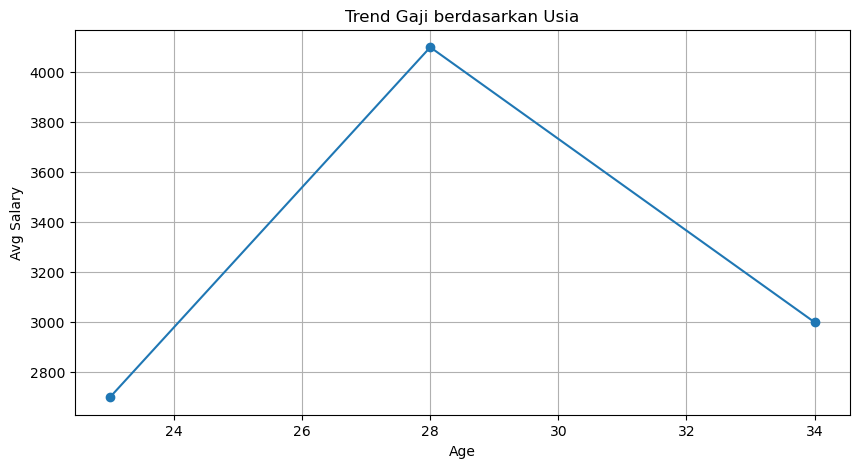

In [6]:
#5. Advanced Data Analysis and Visualization
#Tugas 7: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.
import matplotlib.pyplot as plt
import pandas as pd

gajiTren = spark.sql('''
SELECT Age, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(gajiTren['Age'], gajiTren['AvgSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Avg Salary')
plt.title('Trend Gaji berdasarkan Usia')
plt.grid(True)
plt.show()

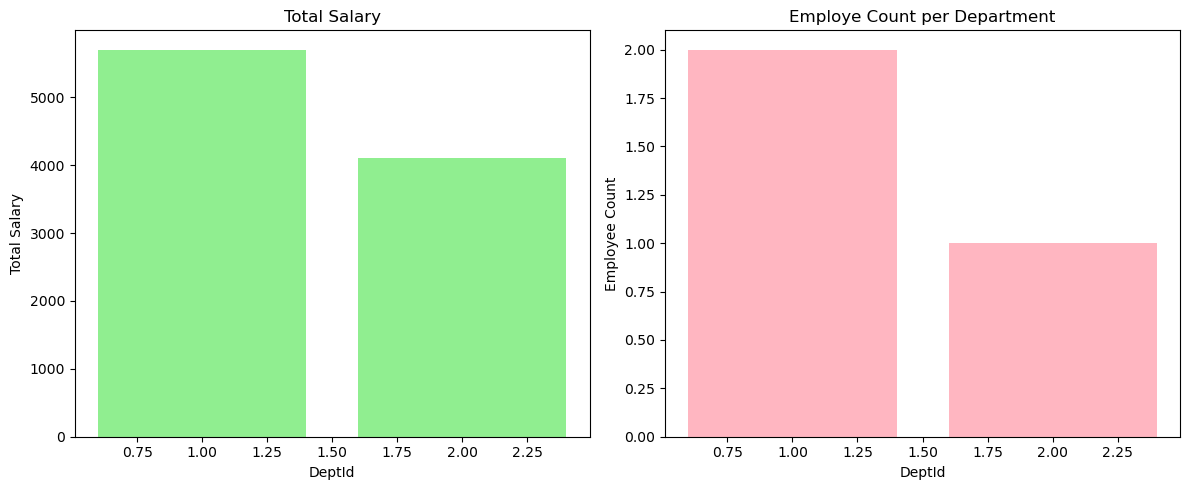

In [15]:
#HomeWork 1. unakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
import matplotlib.pyplot as plt

deptData = spark.sql('''
SELECT DeptId, SUM(Salary) AS TotalSalary, COUNT(Name) AS EmployeeCount
FROM employees
GROUP BY DeptId
''').toPandas()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(deptData['DeptId'], deptData['TotalSalary'], color='lightgreen')
ax[0].set_title('Total Salary')
ax[0].set_xlabel('DeptId')
ax[0].set_ylabel('Total Salary')
ax[1].bar(deptData['DeptId'], deptData['EmployeeCount'], color='lightpink')
ax[1].set_title('Employe Count per Department')
ax[1].set_xlabel('DeptId')
ax[1].set_ylabel('Employee Count')
plt.tight_layout()
plt.show()

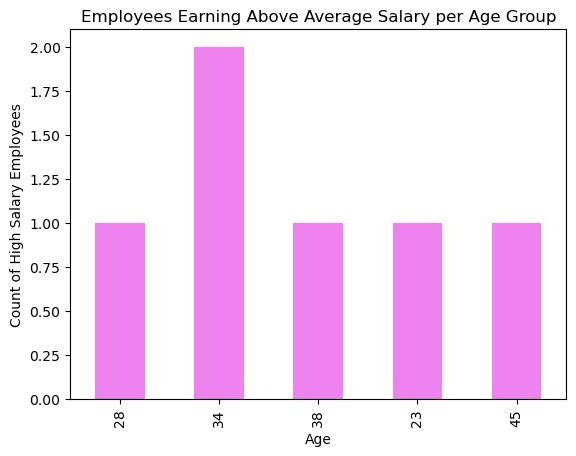

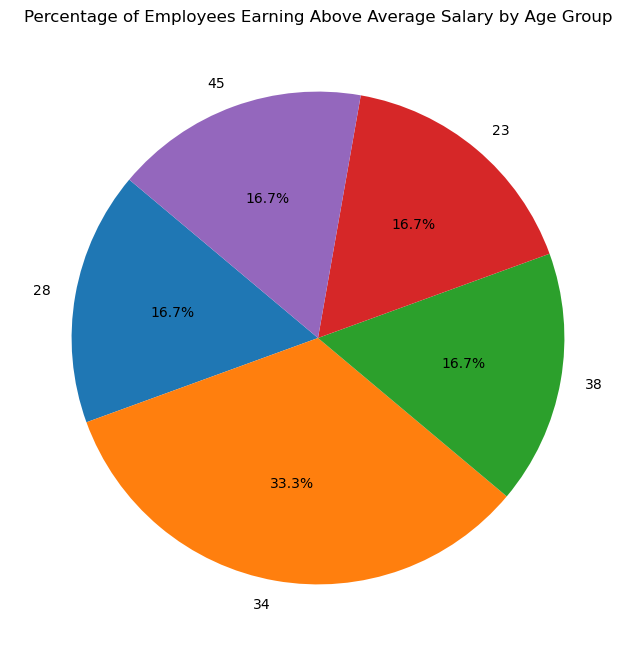

In [30]:
#HomeWork 2. Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("SalaryAnalysis").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4000, 2),
    ('Lee', 23, 'M', 2500, 1),
    ('John', 45, 'M', 5000, 3),
    ('Maria', 39, 'F', 7000, 2),
    ('Steve', 34, 'M', 5000, 1),
    ('Lucy', 28, 'F', 3500, 2),
    ('Lily', 31, 'F', 4200, 3),
    ('Mike', 26, 'M', 2800, 1),
    ('Alice', 38, 'F', 4000, 2),
    ('Bob', 34, 'M', 5000, 1),
    ('Eve', 23, 'F', 4000, 1),
    ('Sam', 45, 'M', 6000, 1),
    ('Roger', 38, 'M', 3400, 2)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
employees = spark.createDataFrame(data, columns)
employees.createOrReplaceTempView('employees')

high_salary_data = spark.sql('''
WITH AvgSalaryByAge AS (
SELECT Age, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Age
)
SELECT e.Age, COUNT(e.Name) AS HighSalaryCount
FROM employees e
JOIN AvgSalaryByAge a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
GROUP BY e.Age
''').toPandas()

# Visualisasi data dalam bentuk grafik batang
high_salary_data.plot(kind='bar', x='Age', y='HighSalaryCount', color='violet', legend=False)
plt.xlabel('Age')
plt.ylabel('Count of High Salary Employees')
plt.title('Employees Earning Above Average Salary per Age Group')
plt.show()

print("\n")

# Visualisasi data dalam bentuk pie chart
plt.figure(figsize=(8, 8))
plt.pie(high_salary_data['HighSalaryCount'], labels=high_salary_data['Age'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees Earning Above Average Salary by Age Group')
plt.show()



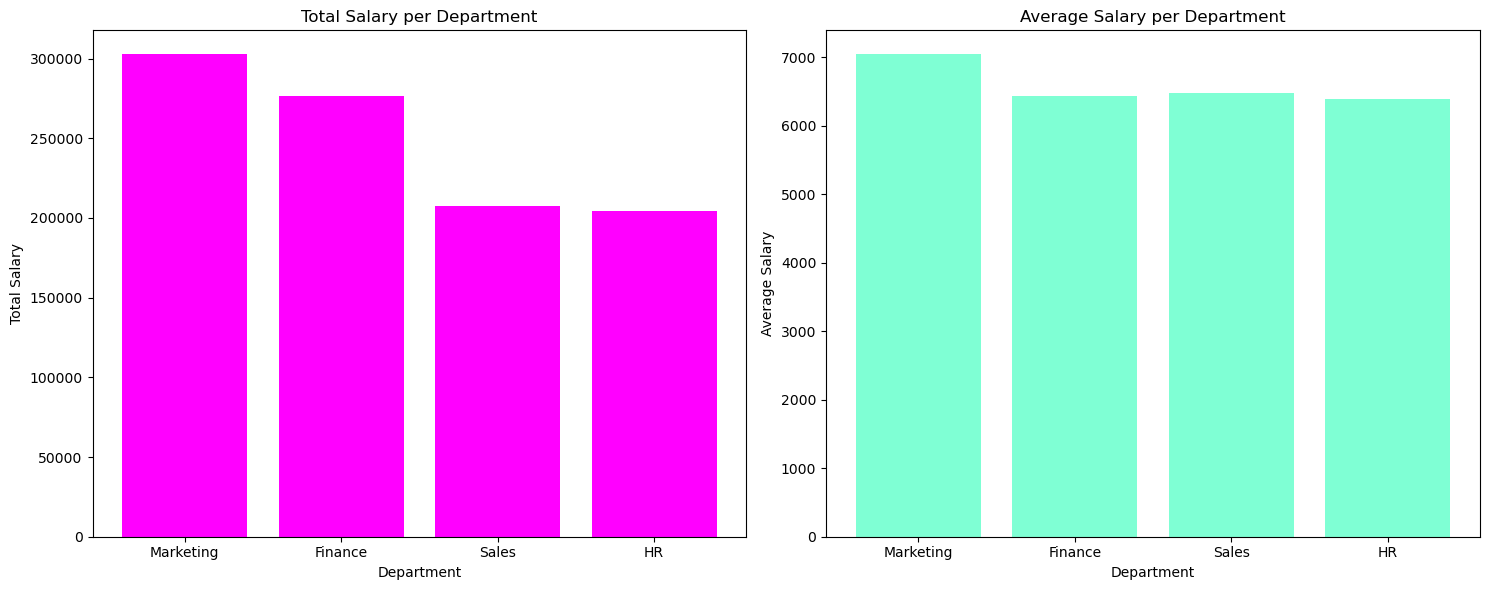

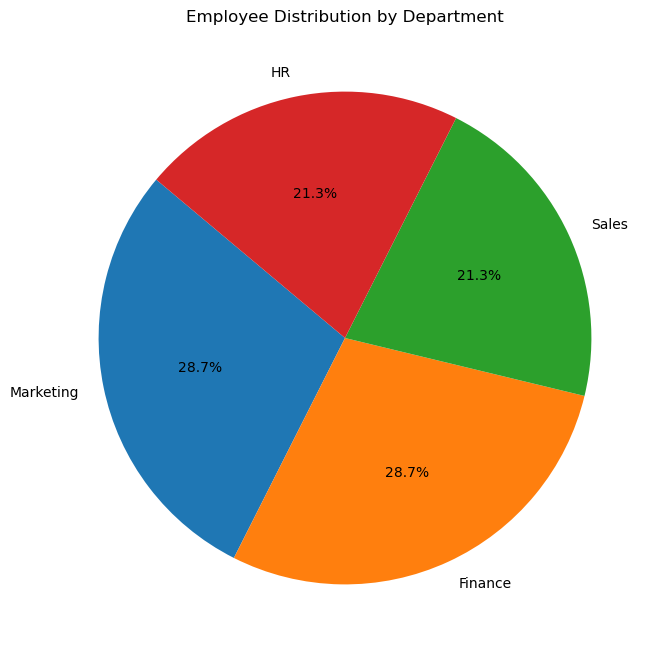

In [34]:
#HomeWork 3. Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import random

# Membuat Spark session
spark = SparkSession.builder.appName("DeepAnalysis").getOrCreate()

# Membuat dataset besar dengan lebih dari 100 baris data
names = ['James', 'Anna', 'Lee', 'Meli', 'John', 'Jane', 'Steve', 'Lucy', 'Tom', 'Lily', 
         'Mike', 'Alice', 'Bob', 'Eve', 'Sam']
departments = [(1, 'HR'), (2, 'Marketing'), (3, 'Sales'), (4, 'Finance')]

employees_data = [
    (random.choice(names), random.randint(22, 60), random.choice(['M', 'F']), 
     random.randint(2500, 10000), random.choice([1, 2, 3, 4]))
    for _ in range(150)
]

projects_data = [(i, f'Project {i % 3 + 1}') for i in range(1, 6)]

# Membuat DataFrame untuk karyawan, departemen, dan proyek
employees_df = spark.createDataFrame(employees_data, ['name', 'age', 'gender', 'salary', 'deptid'])
departments_df = spark.createDataFrame(departments, ['deptid', 'deptname'])
projects_df = spark.createDataFrame(projects_data, ['projectid', 'projectname'])

# Menyimpan DataFrame sebagai tabel SQL
employees_df.createOrReplaceTempView('employees')
departments_df.createOrReplaceTempView('departments')
projects_df.createOrReplaceTempView('projects')

# Query untuk total gaji, rata-rata gaji, dan jumlah karyawan per departemen
dept_analysis = spark.sql('''
    SELECT d.DeptName, COUNT(e.Name) AS EmployeeCount, SUM(e.Salary) AS TotalSalary, AVG(e.Salary) AS AvgSalary
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    ORDER BY TotalSalary DESC
''').toPandas()

# Query untuk peringkat gaji karyawan di setiap departemen
ranked_salaries = spark.sql('''
    SELECT e.Name, d.DeptName, e.Salary,
           RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    ORDER BY d.DeptName, SalaryRank
''').toPandas()

# Visualisasi total dan rata-rata gaji per departemen menggunakan bar chart
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart Total Salary per Department
ax[0].bar(dept_analysis['DeptName'], dept_analysis['TotalSalary'], color='magenta')
ax[0].set_title('Total Salary per Department')
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Total Salary')

# Bar chart Avg Salary per Department
ax[1].bar(dept_analysis['DeptName'], dept_analysis['AvgSalary'], color='aquamarine')
ax[1].set_title('Average Salary per Department')
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Average Salary')

plt.tight_layout()
plt.show()

print("\n")

# Pie chart untuk distribusi jumlah karyawan per departemen
plt.figure(figsize=(8, 8))
plt.pie(dept_analysis['EmployeeCount'], labels=dept_analysis['DeptName'], autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Department')
plt.show()
